In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
#store = pd.HDFStore('X_pca.h5')
#X_pca = store['X_pca']

store = pd.HDFStore('X_pca.h5')
X_pca = store['X_pca']

store = pd.HDFStore('X_mob.h5')
X_mob = store['X_mob']

store = pd.HDFStore('y_default.h5')
y_default = store['y_default']

store = pd.HDFStore('y_prepay.h5')
y_prepay = store['y_prepay']

X_pca = X_pca.join(X_mob)

In [3]:
X_pca_add = X_pca[X_pca['mob']>4].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/2)
X_pca_add_half_sample = X_pca_add.sample(frac = 0.5)
X_pca = pd.concat([X_pca, X_pca_add_half_sample])

zeros = pd.DataFrame(np.zeros(X_pca_add_half_sample.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [4]:
X_pca_add = X_pca[X_pca['mob']>4].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/4*3)
X_pca_add_half_sample = X_pca_add.sample(frac = 0.5)
X_pca = pd.concat([X_pca, X_pca_add_half_sample])

zeros = pd.DataFrame(np.zeros(X_pca_add_half_sample.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [5]:
X_pca_add = X_pca[X_pca['mob']>4].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/4)
X_pca_add_half_sample = X_pca_add.sample(frac = 0.5)
X_pca = pd.concat([X_pca, X_pca_add_half_sample])

zeros = pd.DataFrame(np.zeros(X_pca_add_half_sample.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [6]:
X_pca.shape

(1927966, 12)

In [7]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_default, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.14843341
Validation score: 0.959601
Iteration 2, loss = 0.14614422
Validation score: 0.959601
Iteration 3, loss = 0.14584373
Validation score: 0.959601
Iteration 4, loss = 0.14559785
Validation score: 0.959601
Iteration 5, loss = 0.14542129
Validation score: 0.959595
Iteration 6, loss = 0.14529730
Validation score: 0.959601
Iteration 7, loss = 0.14523263
Validation score: 0.959601
Iteration 8, loss = 0.14514222
Validation score: 0.959601
Iteration 9, loss = 0.14506567
Validation score: 0.959601
Iteration 10, loss = 0.14500876
Validation score: 0.959601


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.793


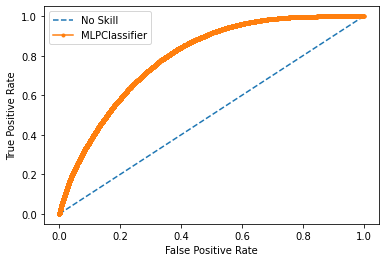

532.8561415672302 s


In [8]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=10, early_stopping=True, learning_rate_init=0.001, verbose=True)
model.fit(trainX, trainy)
time_end = time.time()

# save the model to disk
filename = 'nn_model_no_Time_default.sav'
#filename = 'nn_model_date_default.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")

In [9]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_prepay, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.35165904
Validation score: 0.879057
Iteration 2, loss = 0.34816017
Validation score: 0.879064
Iteration 3, loss = 0.34673690
Validation score: 0.879965
Iteration 4, loss = 0.34569908
Validation score: 0.880684
Iteration 5, loss = 0.34420739
Validation score: 0.880522
Iteration 6, loss = 0.34351173
Validation score: 0.879466
Iteration 7, loss = 0.34279086
Validation score: 0.880529
Iteration 8, loss = 0.34220860
Validation score: 0.880762
Iteration 9, loss = 0.34184097
Validation score: 0.880944
Iteration 10, loss = 0.34155631
Validation score: 0.881184


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.701


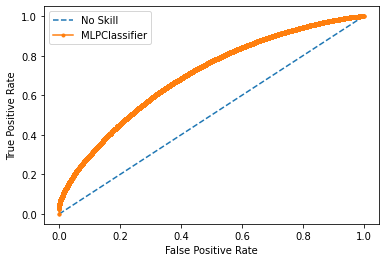

452.38178849220276 s


In [10]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=10, early_stopping=True, learning_rate_init=0.001, verbose=True)
model.fit(trainX, trainy)

time_end = time.time()

filename = 'nn_model_no_Time_prepay.sav'
#filename = 'nn_model_date_prepay.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")